In [1]:
#Import libraries

import numpy as np
import pandas as pd
from hmmlearn import hmm
import warnings
import csv
from constants import *
import math
import matplotlib.pyplot as plt
import collections, operator
warnings.filterwarnings("ignore")

In [2]:
# Raw genes
df = pd.read_csv('../Data/merged.txt', sep=",",na_values=['NA'])
X = df[['GeneName','cdRPKM0','cdRPKM1','cdRPKM2']]
print("Before dropping",len(X))
X = X.dropna(axis=0, how='any')
X.to_csv("../Data/merged_cleaned.txt", index=False)
print("After dropping", len(X))

Before dropping 19210
After dropping 11087


In [3]:
def plot_cluster(cluster, Z, X):
    fig = plt.subplot(111)
    var_plot_list = CDRPKM_LIST
    count=0
    for i in range(len(X)):
        if(Z[i] == cluster):
            fig.plot(CDRPKM_LIST, X[i])
            count+=1
    title = "HMM "+ str(cluster) + " : " + str(count) + " points "
    plt.title(title)
    plt.show()
    
def fit_HMM(components, covariance):
    clf = hmm.GaussianHMM(n_components=components,covariance_type=covariance) #consider Gaussian Emissions
    return clf

def BIC(model,X):
    LogLikelihood = model.score(X)
    num_hidden_states = model.n_components
    # D counts transition matrix, emission matrix, sequences estimated (Z), covariance matrix
    D = ((num_hidden_states*(num_hidden_states+1))/2) + 2*(num_hidden_states**2)
    BIC = LogLikelihood - (D/2)*np.log(len(X))
    return BIC

def plot_BIC(list_k, BIC_score):
    fig = plt.subplot(111)
    plt.plot(list_k, BIC_score, marker='o')  
    plt.xlabel('Value of K')
    plt.ylabel('Objective')
    plt.title('BIC')
    plt.show()   

In [4]:
#Dataset

df_main = pd.read_csv('../Data/cleaned.txt', sep=",")
print("Dataset size is",len(df_main))
print(df_main.head(5))
X = np.log2(df_main.values)
LENGTH, DIMENSION = X.shape
print("****************************")
print("First 5 log2 values\n",X[:5])

Dataset size is 11087
     cdRPKM0    cdRPKM1    cdRPKM2
0   8.539825   5.879642   5.990043
1  13.837680   4.128452   6.882499
2  39.456786  62.505536  84.519655
3   2.104887   3.488833   2.908098
4  10.010800  17.066902   9.484017
****************************
First 5 log2 values
 [[ 3.09420655  2.55572822  2.58256628]
 [ 3.79053016  2.04560095  2.78293239]
 [ 5.30220154  5.96591207  6.40121497]
 [ 1.07374244  1.80274443  1.54007587]
 [ 3.32348535  4.09312932  3.24549826]]


In [19]:
#Fit HMM

remodel = fit_HMM(7,'diag')
remodel.fit(X) #get sequence of states using Viterbi
Z = remodel.predict(X)

In [20]:
print("Hidden states samples")
counts = {}

for idx,i in enumerate(Z):
    if(idx%1000==0):
        print("State of", idx, " is ",i)
    if(i not in counts):
        counts[i]=1
    else:
        counts[i]+=1
        
print("Counts of each state are")
for i in range(0,len(counts)):
    print("HMM State",i,":",counts[i])

Hidden states samples
State of 0  is  6
State of 1000  is  3
State of 2000  is  3
State of 3000  is  1
State of 4000  is  3
State of 5000  is  1
State of 6000  is  5
State of 7000  is  3
State of 8000  is  2
State of 9000  is  2
State of 10000  is  2
State of 11000  is  2
Counts of each state are
HMM State 0 : 2066
HMM State 1 : 1809
HMM State 2 : 2331
HMM State 3 : 1420
HMM State 4 : 695
HMM State 5 : 606
HMM State 6 : 2160


In [21]:
print("Transition matrix")
print(remodel.transmat_)
print()

Transition matrix
[[ 0.19273791  0.16455077  0.19788771  0.12652789  0.06367565  0.06016673
   0.19445334]
 [ 0.17416279  0.16054774  0.19335609  0.13753911  0.07308767  0.05082472
   0.21048188]
 [ 0.19007341  0.15521938  0.23007227  0.12483142  0.06023742  0.04507612
   0.19448997]
 [ 0.18507285  0.16352069  0.1922339   0.13358687  0.07514149  0.05878138
   0.19166283]
 [ 0.18592516  0.14373152  0.22267505  0.11769196  0.0793915   0.06088502
   0.18969979]
 [ 0.16446448  0.16793927  0.19608131  0.12457849  0.06529332  0.10466902
   0.1769741 ]
 [ 0.19287243  0.17496611  0.21232721  0.13235095  0.06120988  0.05035752
   0.1759159 ]]



In [22]:
# X_i = [[],[],[]]
# for idx,i in enumerate(Z[:5]):
#     if(i==0):
#         print("0 gene",df.iloc[idx]['GeneName'])
#     elif(i==1):
#         print("1 gene",df.iloc[idx]['GeneName'])
#     elif(i==2):
#         print("2 gene",df.iloc[idx]['GeneName'])
#     X_i[i].append(df.iloc[idx]['GeneName'])


# with open('../Data/Group0_Gene.txt', mode='w') as gene0_file:
#         gene_writer = csv.writer(gene0_file,delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
#         gene_writer.writerow([df.iloc[idx]['GeneName']])
#         gene0_file.close()
        

In [23]:
print("Means and vars of each hidden state")
for i in range(remodel.n_components):
    print("Hidden state {0}".format(i))
    print("mean = ", remodel.means_[i])
    print("var = ", remodel.covars_[i])
    print()

Means and vars of each hidden state
Hidden state 0
mean =  [ 4.57450388  4.73765738  4.739506  ]
var =  [[ 0.3089579   0.          0.        ]
 [ 0.          0.18124131  0.        ]
 [ 0.          0.          0.198799  ]]

Hidden state 1
mean =  [ 1.51463503  1.53169514  1.76597542]
var =  [[ 0.83488272  0.          0.        ]
 [ 0.          0.59227671  0.        ]
 [ 0.          0.          0.60342895]]

Hidden state 2
mean =  [ 3.61870512  3.72643365  3.85313008]
var =  [[ 0.36140979  0.          0.        ]
 [ 0.          0.20000187  0.        ]
 [ 0.          0.          0.21034673]]

Hidden state 3
mean =  [ 5.71512546  5.92032328  5.83886604]
var =  [[ 0.30689968  0.          0.        ]
 [ 0.          0.2070872   0.        ]
 [ 0.          0.          0.22340328]]

Hidden state 4
mean =  [-0.11837453 -0.19690362  0.0399702 ]
var =  [[ 1.25230075  0.          0.        ]
 [ 0.          1.12996556  0.        ]
 [ 0.          0.          1.23527937]]

Hidden state 5
mean =  [ 7.56

In [18]:
for idx, hidden_state in enumerate(remodel.covars_):
    print("For hidden state",idx)
    rho_12 = hidden_state[0][1]/math.sqrt(hidden_state[0][0]*hidden_state[1][1])
    print("Rho12:",rho_12)
    rho_23 = hidden_state[1][2]/math.sqrt(hidden_state[1][1]*hidden_state[2][2])
    print("Rho23",rho_23)
    rho_13 = hidden_state[0][2]/math.sqrt(hidden_state[0][0]*hidden_state[2][2])
    print("Rho13:",rho_13)
    print("Rho12*Rho23:", rho_12*rho_23)
    print("****************************\n")

For hidden state 0
Rho12: 0.7520068511
Rho23 0.630552488546
Rho13: 0.670961534715
Rho12*Rho23: 0.474179791365
****************************

For hidden state 1
Rho12: 0.899299958191
Rho23 0.933718547099
Rho13: 0.873989996843
Rho12*Rho23: 0.839693050368
****************************

For hidden state 2
Rho12: 0.839984720491
Rho23 0.889672721436
Rho13: 0.820700135291
Rho12*Rho23: 0.747311492244
****************************

For hidden state 3
Rho12: 0.815056801441
Rho23 0.801585945942
Rho13: 0.791617975033
Rho12*Rho23: 0.65333807718
****************************

For hidden state 4
Rho12: 0.980434258794
Rho23 0.977037580129
Rho13: 0.950653050703
Rho12*Rho23: 0.957921115687
****************************

For hidden state 5
Rho12: 0.933020075985
Rho23 0.962003024874
Rho13: 0.907408143105
Rho12*Rho23: 0.897568135365
****************************

For hidden state 6
Rho12: 0.622331587485
Rho23 0.781044081522
Rho13: 0.696986594745
Rho12*Rho23: 0.486068403149
****************************



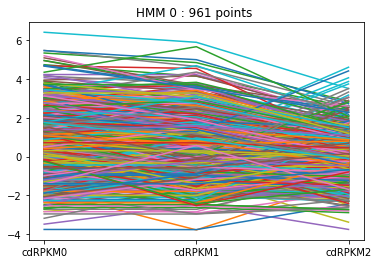

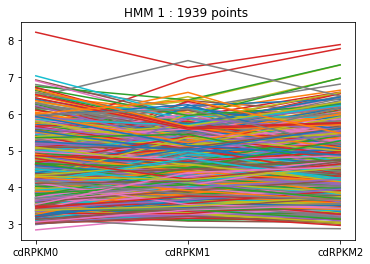

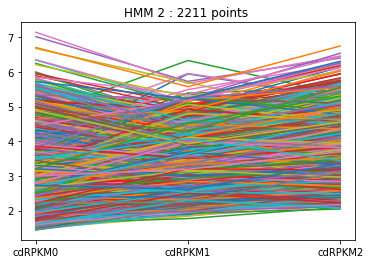

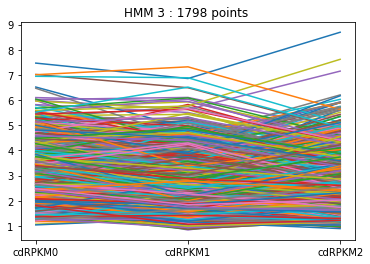

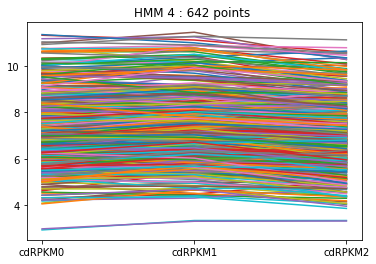

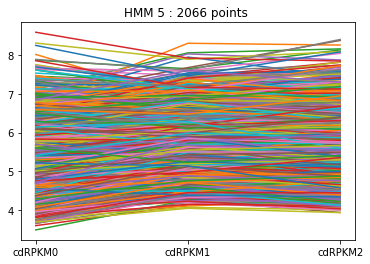

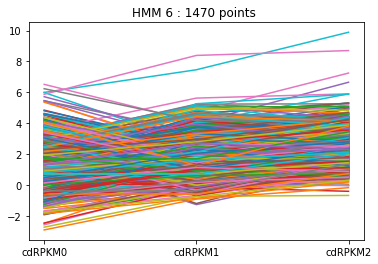

In [19]:
for i in range(0,remodel.n_components):
    plot_cluster(i,Z,X)
    print('\n')

In [20]:
fitted_clusters = []
# Append empty clusters
for i in range(0,remodel.n_components):
    fitted_clusters.append([])
    
for idx, i in enumerate(Z):
    fitted_clusters[Z[idx]].append(list(X[idx]))
    
for i in range(0,3):
    dataframe = pd.DataFrame(np.array(fitted_clusters[i]), columns = list("012"))
    print("Descriptive statistics for cluster", i+1, "is")
    print(dataframe.describe())
    print("*************************************************************************")
    print("*************************************************************************")
    print("*************************************************************************")

Descriptive statistics for cluster 1 is
                0           1           2
count  961.000000  961.000000  961.000000
mean     0.749513    0.492113    0.207482
std      1.502992    1.520110    1.110555
min     -3.751284   -3.775287   -3.750181
25%     -0.254269   -0.645561   -0.460771
50%      0.803951    0.448169    0.304200
75%      1.684331    1.589087    0.912842
max      6.399520    5.882543    4.599220
*************************************************************************
*************************************************************************
*************************************************************************
Descriptive statistics for cluster 2 is
                 0            1            2
count  1939.000000  1939.000000  1939.000000
mean      4.263301     4.364172     4.347901
std       0.726943     0.620744     0.673568
min       2.844444     2.917845     2.877569
25%       3.709518     3.904886     3.874490
50%       4.146674     4.303302     4.252418
75%  

In [58]:
print(BIC(remodel,X))

-45782.7791416


In [23]:
K_values = range(1,10,1)
BIC_scores = []
HMM_models = []
for i in range(1,10):
    model = fit_HMM(i,'full')
    model.fit(X) #get sequence of states using Viterbi
    HMM_models.append(model)
    BIC_scores.append(BIC(model,X))

In [27]:
BIC_scores = []
for i in range(0,9):
    BIC_scores.append(BIC(HMM_models[i],X))

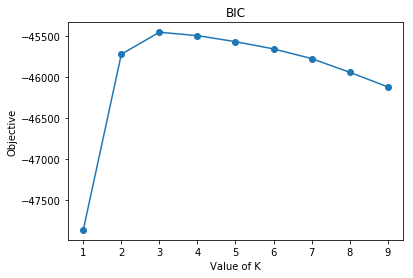

In [28]:
plot_BIC(K_values,BIC_scores)